In [3]:
import numpy as np
from docplex.mp.model import Model

def parse_mkp_dat_file(file_path):
    """
    Parses a .dat file for the Multidimensional Knapsack Problem (MKP).

    Parameters:
    - file_path: str, path to the .dat file.

    Returns:
    - n: int, number of variables (items).
    - m: int, number of constraints (dimensions).
    - optimal_value: int, the optimal value (if available, otherwise 0).
    - profits: list of int, profit values for each item.
    - weights: 2D list of int, weights of items across constraints.
    - capacities: list of int, capacity values for each constraint.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Read the first line: n (variables), m (constraints), optimal value
    n, m, optimal_value = map(int, lines[0].strip().split())

    # Read the profits for each item
    profits = []
    i = 1
    while len(profits) < n:
        profits.extend(map(int, lines[i].strip().split()))
        i += 1

    # Read the weights (m x n matrix)
    weights = []
    for _ in range(m):
        weight_row = []
        while len(weight_row) < n:
            weight_row.extend(map(int, lines[i].strip().split()))
            i += 1
        weights.append(weight_row)

    # Read the capacities for each dimension
    capacities = []
    while len(capacities) < m:
        capacities.extend(map(int, lines[i].strip().split()))
        i += 1

    # Validate data dimensions
    if len(profits) != n:
        raise ValueError(f"Mismatch in number of items: Expected {n}, got {len(profits)}")
    for row in weights:
        if len(row) != n:
            raise ValueError(f"Mismatch in weights row length: Expected {n}, got {len(row)}")
    if len(capacities) != m:
        raise ValueError(f"Mismatch in number of capacities: Expected {m}, got {len(capacities)}")

    return n, m, optimal_value, profits, weights, capacities

def generate_mkp_instance(file_path):
    """
    Generates a Multidimensional Knapsack Problem (MKP) instance from a .dat file.

    Parameters:
    - file_path: str, path to the .dat file.

    Returns:
    - A dictionary containing the MKP instance details:
        - n: Number of items
        - m: Number of constraints
        - profits: Profit values for each item
        - weights: Weight matrix (m x n)
        - capacities: Capacities for each constraint
    """
    n, m, optimal_value, profits, weights, capacities = parse_mkp_dat_file(file_path)

    mkp_instance = {
        "n": n,
        "m": m,
        "optimal_value": optimal_value,
        "profits": profits,
        "weights": weights,
        "capacities": capacities
    }

    return mkp_instance

def print_mkp_instance(mkp_instance):
    """
    Prints the details of a Multidimensional Knapsack Problem (MKP) instance.

    Parameters:
    - mkp_instance: dict, the MKP instance details.
    """
    print(f"Number of items (n): {mkp_instance['n']}")
    print(f"Number of constraints (m): {mkp_instance['m']}")
    print(f"Optimal value (if known): {mkp_instance['optimal_value']}")
    print("Profits:", mkp_instance['profits'])
    print("Weights:")
    for row in mkp_instance['weights']:
        print(row)
    print("Capacities:", mkp_instance['capacities'])

def create_mkp_model(mkp_instance):
    """
    Creates a CPLEX model for the Multidimensional Knapsack Problem (MKP).

    Parameters:
    - mkp_instance: dict, the MKP instance details.

    Returns:
    - model: CPLEX model.
    - x: list of CPLEX binary variables representing item selection.
    """
    n = mkp_instance['n']
    m = mkp_instance['m']
    profits = mkp_instance['profits']
    weights = mkp_instance['weights']
    capacities = mkp_instance['capacities']

    # Create CPLEX model
    model = Model(name="Multidimensional Knapsack Problem")

    # Decision variables: x[i] = 1 if item i is selected, 0 otherwise
    x = model.binary_var_list(n, name="x")

    # Objective: Maximize total profit
    model.maximize(model.sum(profits[i] * x[i] for i in range(n)))

    # Constraints: Ensure total weights do not exceed capacity for each dimension
    for j in range(m):
        model.add_constraint(
            model.sum(weights[j][i] * x[i] for i in range(n)) <= capacities[j],
            f"capacity_constraint_{j}"
        )

    return model, x

In [4]:
file_path = "multi_dim_kp_datasets\hp1.dat"

In [5]:
mkp_instance = generate_mkp_instance(file_path)

# Print the MKP instance details
print_mkp_instance(mkp_instance)

# Create and solve the MKP model
model, x = create_mkp_model(mkp_instance)

Number of items (n): 28
Number of constraints (m): 4
Optimal value (if known): 3418
Profits: [560, 1125, 68, 328, 47, 122, 196, 41, 25, 115, 82, 22, 631, 132, 420, 86, 42, 103, 81, 26, 49, 316, 72, 71, 49, 108, 116, 90]
Weights:
[40, 91, 3, 12, 3, 18, 25, 1, 1, 8, 1, 1, 49, 8, 21, 6, 1, 5, 8, 1, 0, 42, 6, 4, 8, 0, 10, 1]
[16, 92, 4, 18, 6, 0, 8, 2, 1, 6, 2, 1, 70, 9, 22, 4, 1, 5, 6, 0, 4, 8, 4, 3, 0, 10, 0, 6]
[38, 39, 5, 40, 8, 12, 15, 0, 1, 20, 3, 0, 40, 6, 8, 0, 6, 4, 4, 1, 5, 8, 2, 8, 0, 20, 0, 0]
[38, 52, 7, 20, 0, 3, 4, 1, 2, 4, 6, 1, 18, 15, 38, 10, 4, 8, 0, 3, 0, 6, 1, 3, 0, 3, 5, 4]
Capacities: [219, 203, 208, 180]


In [6]:
print(model.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Multidimensional Knapsack Problem

Maximize
 obj: 560 x_0 + 1125 x_1 + 68 x_2 + 328 x_3 + 47 x_4 + 122 x_5 + 196 x_6
      + 41 x_7 + 25 x_8 + 115 x_9 + 82 x_10 + 22 x_11 + 631 x_12 + 132 x_13
      + 420 x_14 + 86 x_15 + 42 x_16 + 103 x_17 + 81 x_18 + 26 x_19 + 49 x_20
      + 316 x_21 + 72 x_22 + 71 x_23 + 49 x_24 + 108 x_25 + 116 x_26 + 90 x_27
Subject To
 capacity_constraint_0: 40 x_0 + 91 x_1 + 3 x_2 + 12 x_3 + 3 x_4 + 18 x_5
                        + 25 x_6 + x_7 + x_8 + 8 x_9 + x_10 + x_11 + 49 x_12
                        + 8 x_13 + 21 x_14 + 6 x_15 + x_16 + 5 x_17 + 8 x_18
                        + x_19 + 42 x_21 + 6 x_22 + 4 x_23 + 8 x_24 + 10 x_26
                        + x_27 <= 219
 capacity_constraint_1: 16 x_0 + 92 x_1 + 4 x_2 + 18 x_3 + 6 x_4 + 8 x_6 + 2 x_7
                        + x_8 + 6 x_9 + 2 x_10 + x_11 + 70 x_12 + 9 x_13
                        + 22 x_14 + 4 x_15 + x_16 + 5 x_17 + 6

In [7]:
# Solve the model
solution = model.solve()

if solution:
    print("Objective value (total profit):", solution.objective_value)
    selected_items = [i + 1 for i in range(mkp_instance['n']) if x[i].solution_value > 0.5]  # Convert to 1-based index
    print("Selected items:", selected_items)
else:
    print("No solution found.")

Objective value (total profit): 3418.0
Selected items: [1, 2, 4, 5, 8, 10, 11, 12, 15, 17, 19, 21, 23, 24, 25, 26, 27, 28]


### QUBO

In [8]:
from qiskit_optimization.translators import from_docplex_mp
from qiskit_optimization.converters import QuadraticProgramToQubo

In [9]:
qp = from_docplex_mp(model)
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Multidimensional Knapsack Problem

Maximize
 obj: 560 x_0 + 1125 x_1 + 68 x_2 + 328 x_3 + 47 x_4 + 122 x_5 + 196 x_6
      + 41 x_7 + 25 x_8 + 115 x_9 + 82 x_10 + 22 x_11 + 631 x_12 + 132 x_13
      + 420 x_14 + 86 x_15 + 42 x_16 + 103 x_17 + 81 x_18 + 26 x_19 + 49 x_20
      + 316 x_21 + 72 x_22 + 71 x_23 + 49 x_24 + 108 x_25 + 116 x_26 + 90 x_27
Subject To
 capacity_constraint_0: 40 x_0 + 91 x_1 + 3 x_2 + 12 x_3 + 3 x_4 + 18 x_5
                        + 25 x_6 + x_7 + x_8 + 8 x_9 + x_10 + x_11 + 49 x_12
                        + 8 x_13 + 21 x_14 + 6 x_15 + x_16 + 5 x_17 + 8 x_18
                        + x_19 + 42 x_21 + 6 x_22 + 4 x_23 + 8 x_24 + 10 x_26
                        + x_27 <= 219
 capacity_constraint_1: 16 x_0 + 92 x_1 + 4 x_2 + 18 x_3 + 6 x_4 + 8 x_6 + 2 x_7
                        + x_8 + 6 x_9 + 2 x_10 + x_11 + 70 x_12 + 9 x_13
                        + 22 x_14 + 4 x_15 + x_16 + 5 x_17 + 6

In [10]:
converter = QuadraticProgramToQubo()
qubo = converter.convert(qp)

print(qubo.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Multidimensional Knapsack Problem

Minimize
 obj: - 274155056 x_0 - 574678221 x_1 - 38624780 x_2 - 186534424 x_3
      - 36267719 x_4 - 71510666 x_5 - 112103068 x_6 - 8249681 x_7 - 10145545 x_8
      - 80446915 x_9 - 23867674 x_10 - 6169318 x_11 - 374062879 x_12
      - 77136828 x_13 - 180047532 x_14 - 40233734 x_15 - 24492762 x_16
      - 44906839 x_17 - 38962977 x_18 - 9909842 x_19 - 18979345 x_20
      - 139024684 x_21 - 27895128 x_22 - 37804943 x_23 - 17954545 x_24
      - 68969148 x_25 - 31666436 x_26 - 22105026 x_27
      - 2244312 capacity_constraint_0@int_slack@0
      - 4488624 capacity_constraint_0@int_slack@1
      - 8977248 capacity_constraint_0@int_slack@2
      - 17954496 capacity_constraint_0@int_slack@3
      - 35908992 capacity_constraint_0@int_slack@4
      - 71817984 capacity_constraint_0@int_slack@5
      - 143635968 capacity_constraint_0@int_slack@6
      - 206476704 capacity_constraint_

In [11]:
# number of variables
num_vars = qubo.get_num_vars()
print('Number of variables:', num_vars)

Number of variables: 60


In [12]:
from pce import *
from qubo_to_maxcut import *

In [13]:
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector

In [14]:
pauli_encoder = PauliCorrelationEncoding()

#edges,weights = pauli_encoder.get_edges_from_qp(problem)
k = 2    # type of compression (quadratic or cubic)
num_qubits = pauli_encoder.find_n(qubo.get_num_binary_vars(),k)


pauli_strings = SparsePauliOp(pauli_encoder.generate_pauli_strings(num_qubits,qubo.get_num_binary_vars(), k))


print(f"We can encode the problem with {num_qubits} qubits using {len(pauli_strings)} Pauli strings using k={k} compression,\n which are {pauli_strings}")



We can encode the problem with 7 qubits using 60 Pauli strings using k=2 compression,
 which are SparsePauliOp(['XXIIIII', 'XIXIIII', 'XIIXIII', 'XIIIXII', 'XIIIIXI', 'XIIIIIX', 'IXXIIII', 'IXIXIII', 'IXIIXII', 'IXIIIXI', 'IXIIIIX', 'IIXXIII', 'IIXIXII', 'IIXIIXI', 'IIXIIIX', 'IIIXXII', 'IIIXIXI', 'IIIXIIX', 'IIIIXXI', 'IIIIXIX', 'IIIIIXX', 'YYIIIII', 'YIYIIII', 'YIIYIII', 'YIIIYII', 'YIIIIYI', 'YIIIIIY', 'IYYIIII', 'IYIYIII', 'IYIIYII', 'IYIIIYI', 'IYIIIIY', 'IIYYIII', 'IIYIYII', 'IIYIIYI', 'IIYIIIY', 'IIIYYII', 'IIIYIYI', 'IIIYIIY', 'IIIIYYI', 'IIIIYIY', 'IIIIIYY', 'ZZIIIII', 'ZIZIIII', 'ZIIZIII', 'ZIIIZII', 'ZIIIIZI', 'ZIIIIIZ', 'IZZIIII', 'IZIZIII', 'IZIIZII', 'IZIIIZI', 'IZIIIIZ', 'IIZZIII', 'IIZIZII', 'IIZIIZI', 'IIZIIIZ', 'IIIZZII', 'IIIZIZI', 'IIIZIIZ'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+

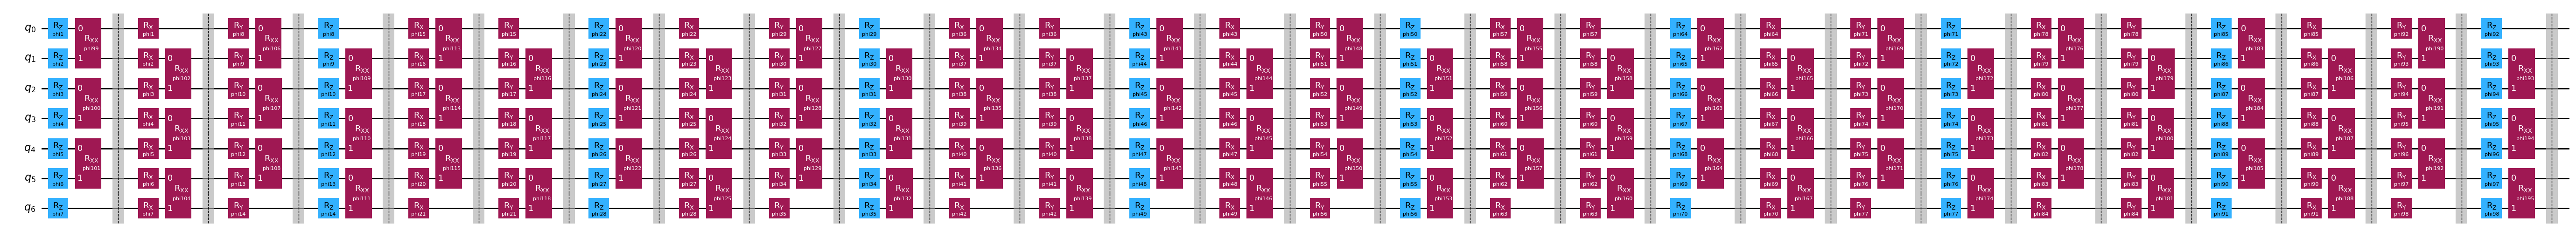

In [15]:
depth = 2 * num_qubits
ansatz = pauli_encoder.BrickWork(depth= depth, num_qubits=num_qubits)
ansatz.draw('mpl',fold=-1)

In [16]:
from qiskit.primitives import BackendEstimator
from qiskit_aer import AerSimulator
backend = AerSimulator(method='automatic')

estimator = BackendEstimator(backend=backend, options={'shots': 1000})

C:\Users\monitsharma\AppData\Local\Temp\ipykernel_21052\2853551972.py:5: DeprecationWarning: The class ``qiskit.primitives.backend_estimator.BackendEstimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendEstimator` class is `BackendEstimatorV2`.
  estimator = BackendEstimator(backend=backend, options={'shots': 1000})


In [17]:
pce = PauliCorrelationOptimizer(estimator=estimator, 
                                pauli_encoder=pauli_encoder,
                                depth=depth,
                                num_qubits=num_qubits,
                                k=k,
                                method='exact', 
                                loss_method='qubo',
                                qubo=qubo,
                                multi_op=True)  # method can be 'exact' or 'quantum' and loss can 
                                                # be qubo or maxcut



In [18]:
maxiter = 50
from qiskit_algorithms.optimizers import SLSQP
optimizer =SLSQP(maxiter=maxiter)
params = np.random.rand(ansatz.num_parameters)
result=pce.optimize(optimizer,params)


Multi Reoptimization

--- Optimization Round 1 ---
QUBO bitstring: [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
Best QUBO cost: inf
QUBO cost: 112798154.0
Improvement: inf
Improvement detected! Best QUBO cost updated: 112798154.0
Consecutive no-improvement rounds: 0. Rounds remaining before stopping: 10.

--- Optimization Round 2 ---
QUBO bitstring: [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1]
Best QUBO cost: 112798154.0
QUBO cost: 105305444.0
Improvement: 7492710.0
Improvement detected! Best QUBO cost updated: 105305444.0
Consecutive no-improvement rounds: 0. Rounds remaining before stopping: 10.

--- Optimization Round 3 ---
Performing stronger exploration.
QUBO bitstring: [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1

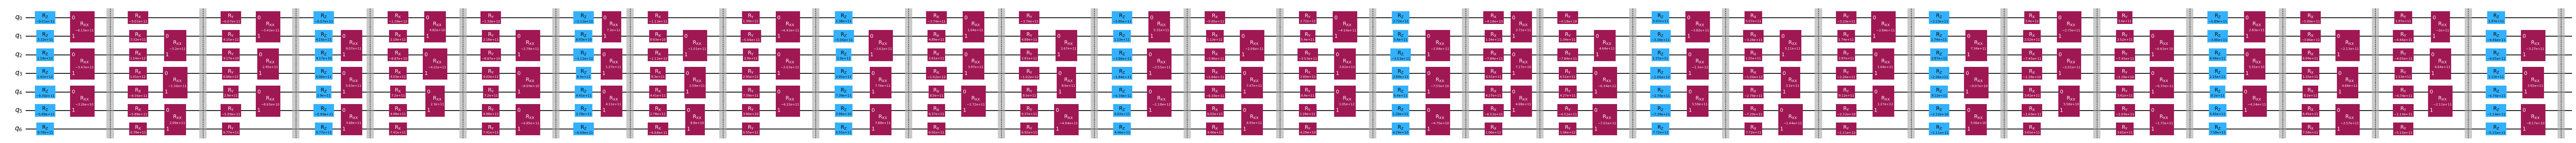

In [19]:
final_ansatz = pauli_encoder.BrickWork(depth= depth, num_qubits=num_qubits).assign_parameters(result)
final_ansatz.draw('mpl',fold=-1)

In [20]:
psi_final = Statevector(final_ansatz)

In [21]:
# Example usage:
# Assuming you have instantiated `psi_final`, `pauli_strings`, and `weight_matrix`
qubo_utility = QUBOUtility()
qubo_bitstring = qubo_utility.evaluate_sign_function(psi_final, pauli_strings)
qubo_cost = qubo.objective.evaluate(qubo_bitstring)

print(qubo_bitstring)
print(qubo_cost)

[1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1]
8651857.0


In [22]:
result_initial = converter.interpret(qubo_bitstring)
initial_cost = qp.objective.evaluate(result_initial)
# check feasibility
inital_feasible = qp.get_feasibility_info(result_initial)[0]


print("Initial MDKP score             :", initial_cost )
print("Initial MDKP solution          :", result_initial)
print("Initial MDKP solution feasible :", inital_feasible)


Initial MDKP score             : 2579.0
Initial MDKP solution          : [1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1.]
Initial MDKP solution feasible : True


In [23]:
optimized_bitstring, final_cost = qubo_utility.bit_swap_search(qubo, bitstring=qubo_bitstring)
print("Optimized bitstring:", optimized_bitstring)
print("Final cost:", final_cost)

Starting cost: 8651857.0
Bit flip: Improved solution by flipping bit 4: Cost = 6812388.0
Bit flip: Improved solution by flipping bit 9: Cost = 4086535.0
Bit flip: Improved solution by flipping bit 11: Cost = 3917421.0
Bit flip: Improved solution by flipping bit 16: Cost = 3425559.0
Bit flip: Improved solution by flipping bit 17: Cost = 3404960.0
Bit flip: Improved solution by flipping bit 18: Cost = 2871983.0
Bit flip: Improved solution by flipping bit 36: Cost = 2764379.0
Bit flip: Improved solution by flipping bit 37: Cost = 2579915.0
Bit flip: Improved solution by flipping bit 44: Cost = 2482559.0
Bit flip: Improved solution by flipping bit 45: Cost = 2318591.0
Bit flip: Improved solution by flipping bit 53: Cost = 1970159.0
Bit flip: Improved solution by flipping bit 55: Cost = 986351.0
Multi-bit flip: Improved solution by flipping bits (4, 17): Cost = 889051.0
Multi-bit flip: Improved solution by flipping bits (4, 20): Cost = 745577.0
Multi-bit flip: Improved solution by flipping 

In [ ]:

result_initial = converter.interpret(optimized_bitstring)
initial_cost = qp.objective.evaluate(result_initial)
# check feasibility
inital_feasible = qp.get_feasibility_info(result_initial)[0]

print("Initial Knapsack score             :", initial_cost )
print("Initial Knapsack solution          :", result_initial)
print("Initial Knapsack solution feasible :", inital_feasible)